# Customer Churn Prediction – End-to-End Machine Learning Pipeline

## Problem Statement

Customer churn is a major concern for subscription based businesses such as banks. The dataset provided contains customer level information, including demographic data, account information, and usage behavior.

The goal of this project is to predict which customers are likely to churn, so the bank can proactively intervene and reduce churn. This model, once deployed, can help the business retain valuable customers, optimize marketing efforts, and improve profitability.

We will treat this as a binary classification problem where the target variable is whether a customer churned (`Attrition_Flag`).

In [1]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [2]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv('BankChurners.csv')

# Show the first few rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Exploratory Data Analysis (EDA)

In this section, we explore the structure and characteristics of the dataset. We examine feature distributions, missing values, data types, class balance, and potential issues to be addressed in preprocessing. The insights from this step guide our modeling strategy.

In [3]:
# Basic dataset information
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Check target column distribution
df['Attrition_Flag'].value_counts(normalize=True) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,proportion
Attrition_Flag,
Existing Customer,83.934038
Attrited Customer,16.065962


In [4]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


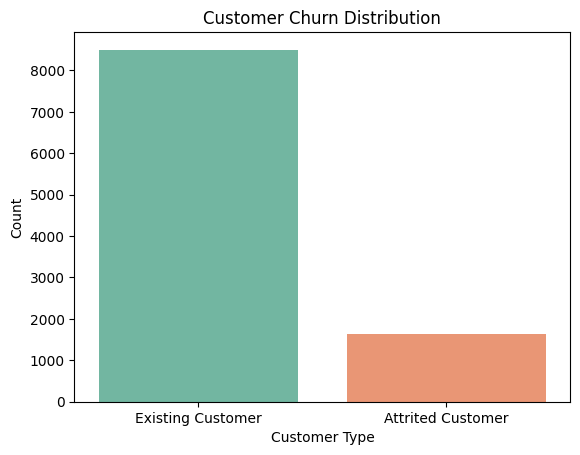

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(x='Attrition_Flag', data=df_cleaned, hue='Attrition_Flag', palette='Set2', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

# Print actual proportions
print(df_cleaned['Attrition_Flag'].value_counts(normalize=True))

In [7]:
# Display summary statistics of numeric features
df_cleaned.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


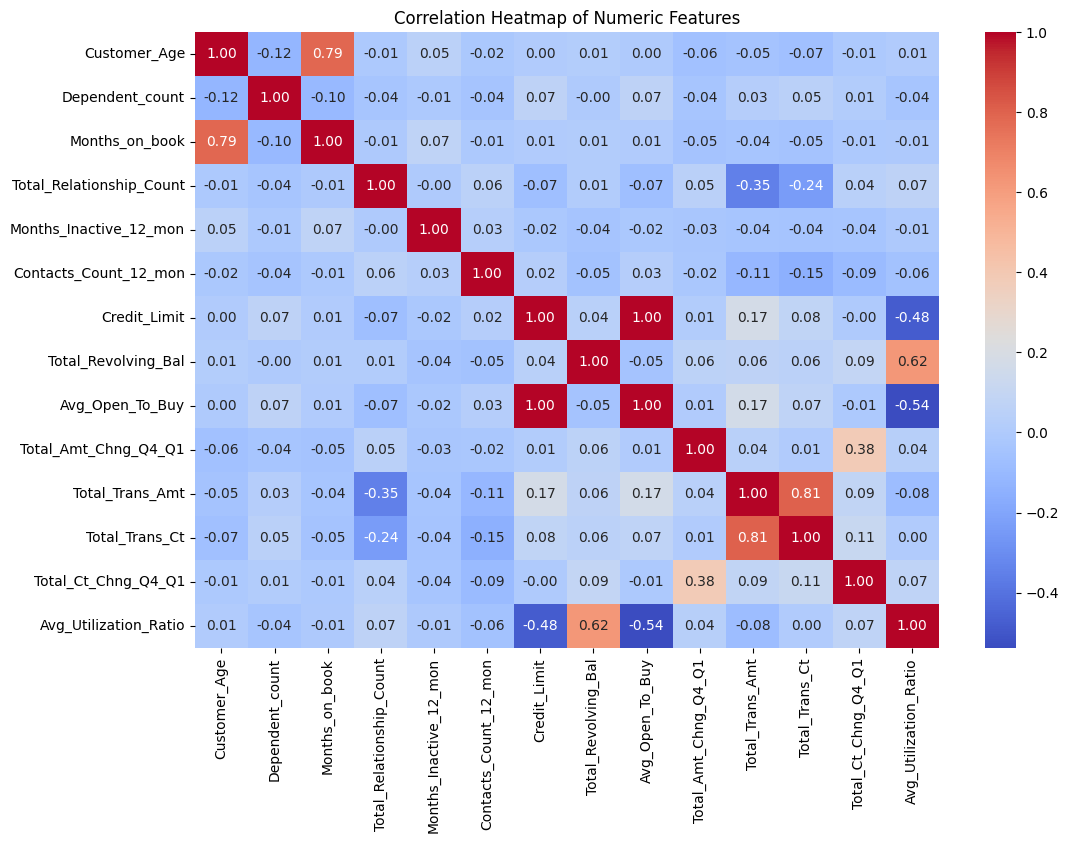

In [8]:
# Visualize correlation between numeric features
# Heatmap to examine correlations between numerical features.
# This helps us understand how strongly features are related to one another.
# Highly correlated features may be redundant or predictive of each other.
# For example, Total_Trans_Ct and Total_Trans_Amt might move together.
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [10]:
# Identify all object-type (categorical) columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

Categorical columns: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


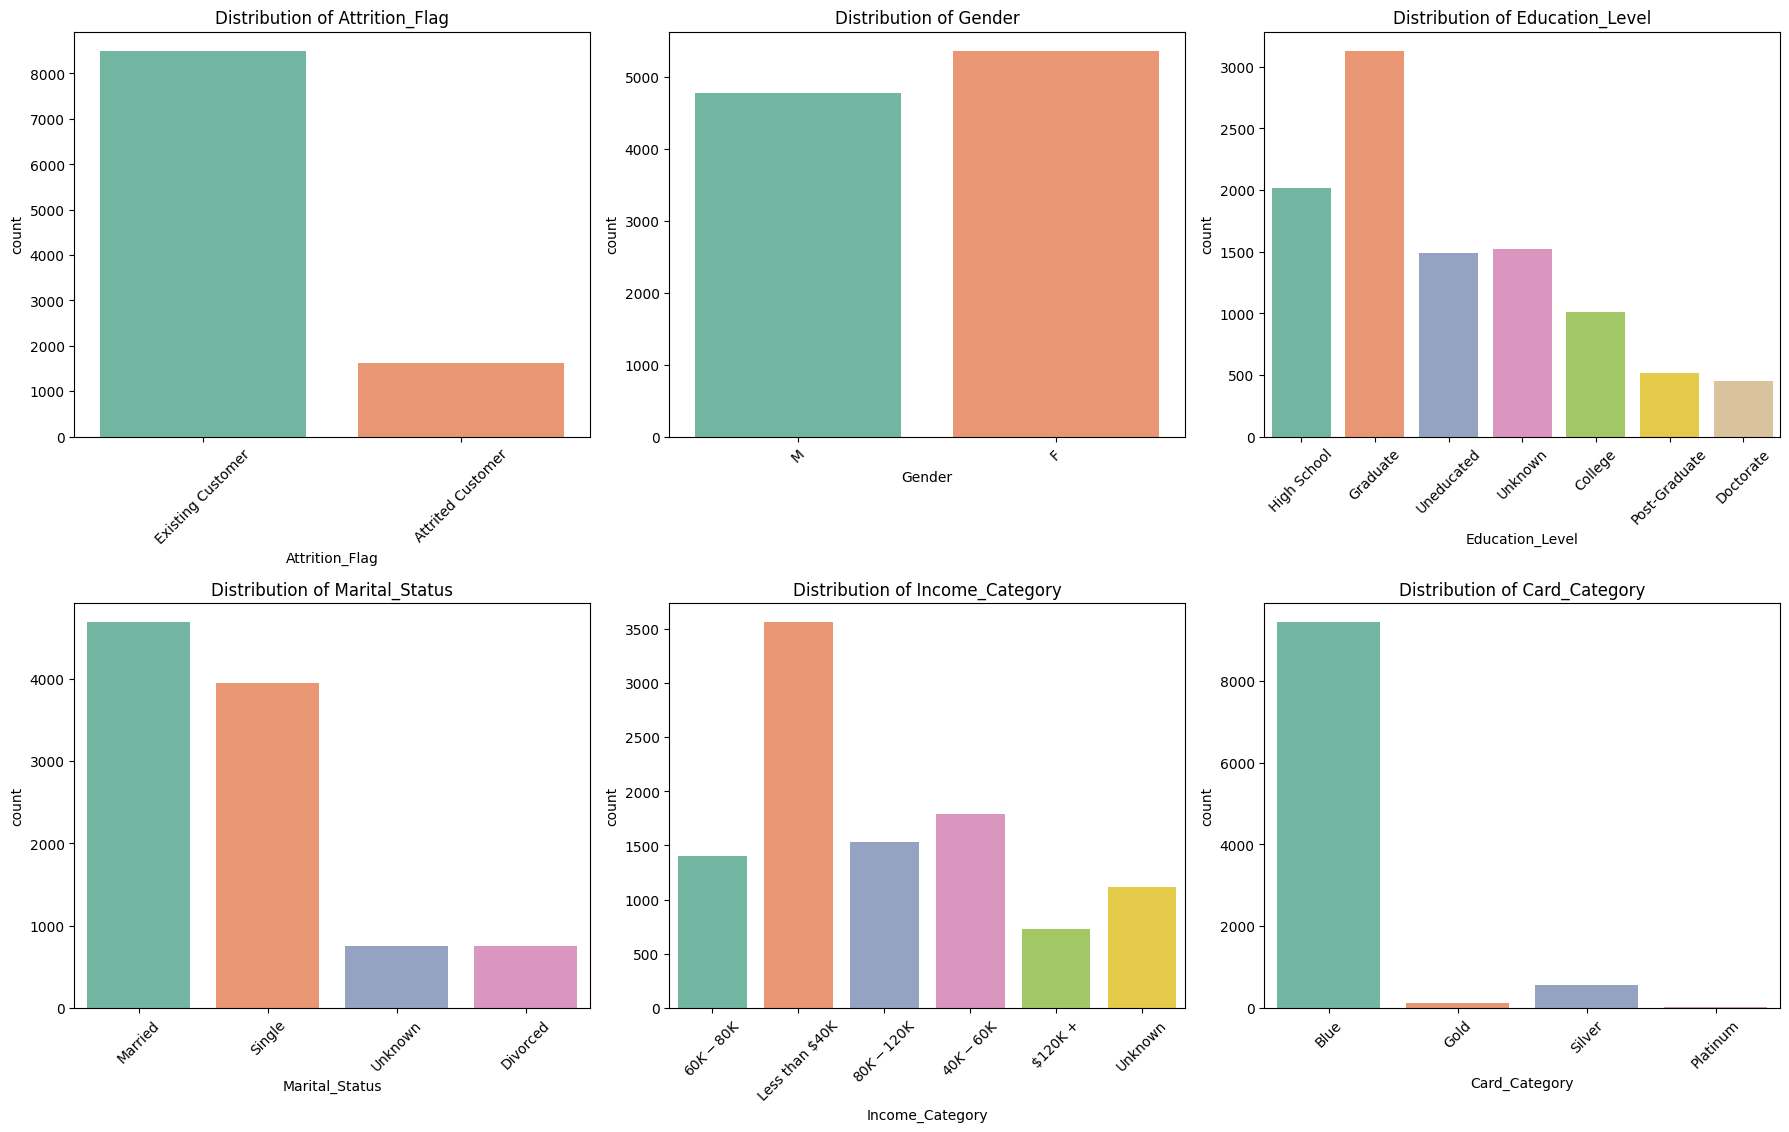

In [11]:
# Plot count distributions for each categorical column
plt.figure(figsize=(18, 16))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_cleaned, x=col, hue=col, palette="Set2", legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

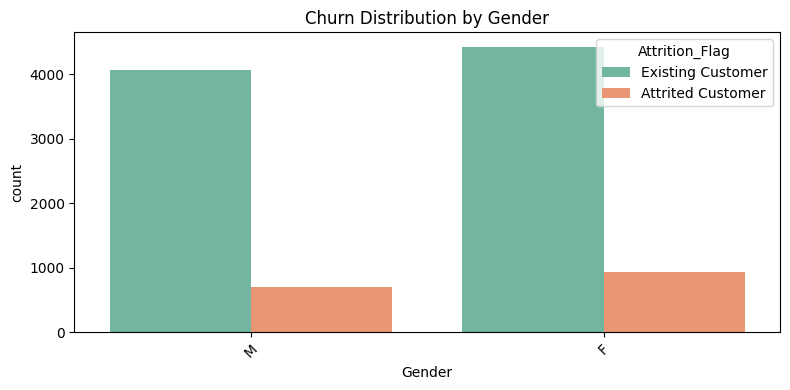

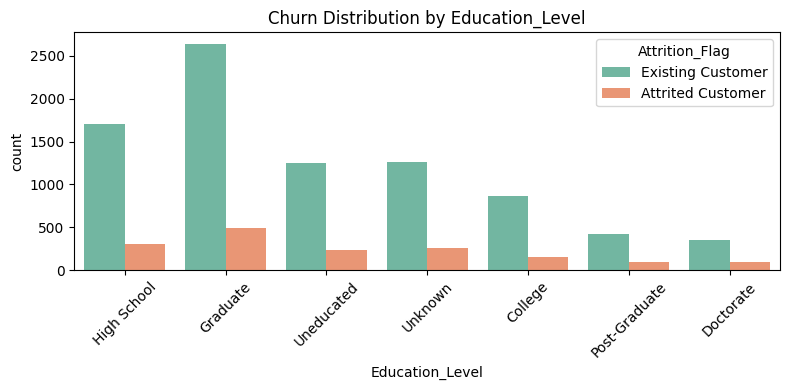

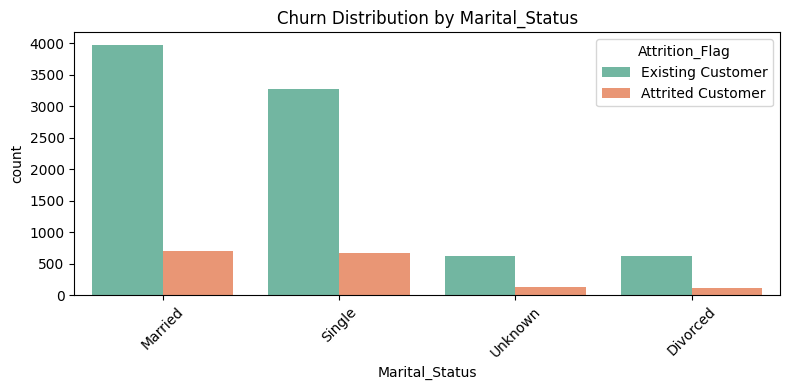

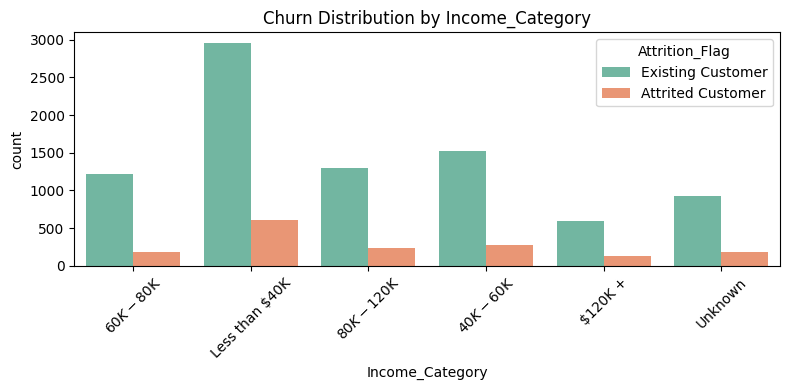

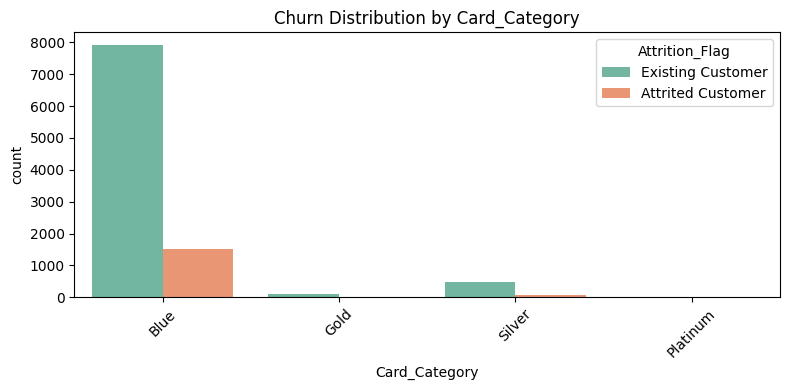

In [12]:
# Visualizing categorical features vs churn

categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Attrition_Flag', data=df_cleaned, palette='Set2')
    plt.title(f'Churn Distribution by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
# Replace 'Unknown' entries in key categorical columns with 'Other' for consistency and model readability
df_cleaned['Education_Level'] = df_cleaned['Education_Level'].replace('Unknown', 'Other')
df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].replace('Unknown', 'Other')
df_cleaned['Income_Category'] = df_cleaned['Income_Category'].replace('Unknown', 'Other')

# Display unique values after replacement to confirm changes
print("Unique Education Levels:", df_cleaned['Education_Level'].unique())
print("Unique Marital Status:", df_cleaned['Marital_Status'].unique())
print("Unique Income Categories:", df_cleaned['Income_Category'].unique())

Unique Education Levels: ['High School' 'Graduate' 'Uneducated' 'Other' 'College' 'Post-Graduate'
 'Doctorate']
Unique Marital Status: ['Married' 'Single' 'Other' 'Divorced']
Unique Income Categories: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Other']


In [16]:
# Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=[
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
], drop_first=True)  # drop_first=True avoids multicollinearity by dropping one dummy per category

# Show the new shape and preview of encoded dataset
print("Encoded Data Shape:", df_encoded.shape)
df_encoded.head()

Encoded Data Shape: (10127, 33)


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Other,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Other,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,False,True,False,False,False,True,False,False,False,False
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,True,False,False,False,False,True,False,False,False,False
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,False,False,False,False


In [17]:
# Convert target to binary (1 for churned, 0 for retained)
df_encoded['Attrition_Flag'] = df_encoded['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Define X (features) and y (target)
X = df_encoded.drop(columns='Attrition_Flag')
y = df_encoded['Attrition_Flag']

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Confirm the shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution in training set:\n", y_train.value_counts(normalize=True))

Training set shape: (8101, 32)
Test set shape: (2026, 32)
Target distribution in training set:
 Attrition_Flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64


In [19]:
# Feature Scaling (Standardization)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create column transformer: scale numeric columns only
scaler = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns)],
    remainder='passthrough'  # Leave non-numeric (encoded categorical) columns as is
)

# Fit on training set, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete. Feature matrix is now ready for model training.")

Scaling complete. Feature matrix is now ready for model training.


In [20]:
# Model Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

# Define all models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Function to train and evaluate
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("=" * 60)

# Run evaluation for each model
for name, model in models.items():
    evaluate_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.64       325

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1701
           1       0.81      0.57      0.67       325

    accuracy                           0.91      2026
   macro avg       0.87      0.77      0.81      2026
weighted avg       0.90      0.91      0.90      2026


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1701
           1       0.82      0.79      0.80       325

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.88      2

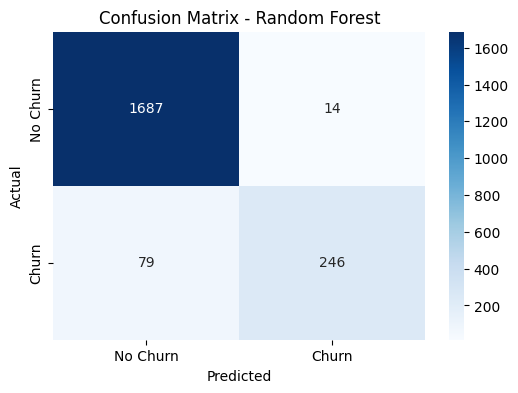

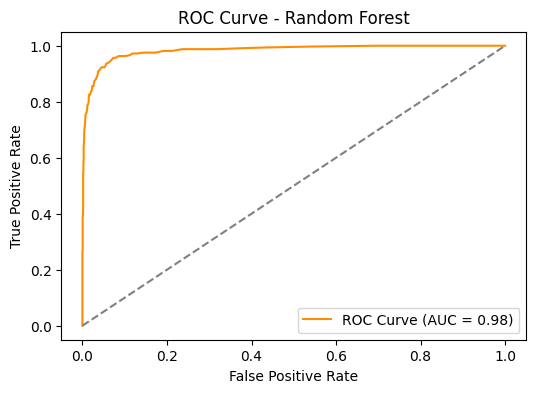

In [22]:
# Evaluate Best Model (Random Forest) in Depth

from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Fit Random Forest again (with fixed seed)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

## Model Evaluation – Random Forest

We evaluated multiple machine learning models on our dataset. Among all models, Random Forest performed the best in terms of accuracy, precision, recall, and F1-score, especially for the churned customers, which is our target focus.

### Confusion Matrix Insights
The confusion matrix shows:
- **True Negatives (1,687)**: Model correctly identified existing customers.
- **True Positives (246)**: Model correctly predicted churned customers.
- **False Negatives (79)**: Model missed a few churned customers, which is expected in imbalanced datasets.
- **False Positives (14)**: Very few existing customers were wrongly classified as churned.

### ROC Curve Analysis
The ROC Curve has a strong upward curve, far above the diagonal (random guessing line). This shows our model is effective at distinguishing churned vs. existing customers. The AUC score confirms this high performance.

This gives us confidence that Random Forest is a reliable model for this task and can be used by the business team to take proactive actions against customer churn.

### Feature Importance Analysis

To understand what drives customer churn, we visualized feature importance from the best performing model, Random Forest. This helps identify which features had the most influence in decision making, and which ones could be prioritized for customer retention strategies.

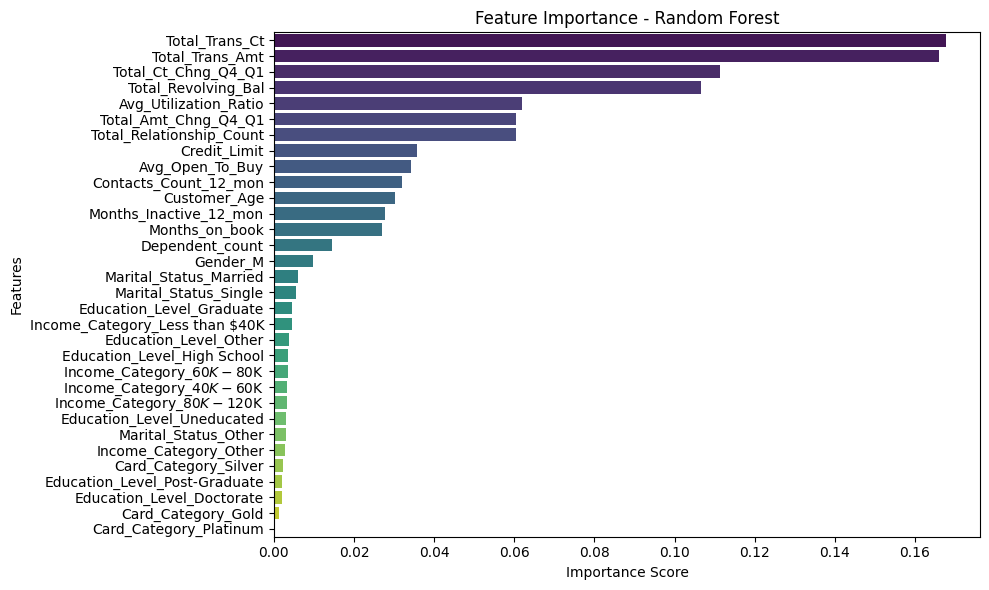

,Feature,Importance
11,Total_Trans_Ct,0.167855
10,Total_Trans_Amt,0.166056
12,Total_Ct_Chng_Q4_Q1,0.111265
7,Total_Revolving_Bal,0.106620
13,Avg_Utilization_Ratio,0.061977
9,Total_Amt_Chng_Q4_Q1,0.060503
3,Total_Relationship_Count,0.060471
6,Credit_Limit,0.035792
8,Avg_Open_To_Buy,0.034236
5,Contacts_Count_12_mon,0.031872


In [24]:
# Feature Importance using Random Forest
importances = best_model.feature_importances_  # Extract feature importance scores
feature_names = X.columns  # Get original feature names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Display top 10 most important features
importance_df.head(10)

### Key Drivers of Customer Churn (Top 10 Features)

The Random Forest model highlights the most influential features driving customer churn:

- **Total_Trans_Ct**: Frequency of transactions is the most important feature. Fewer transactions could indicate declining engagement.
- **Total_Trans_Amt**: Lower transaction amounts may suggest decreased trust or usage.
- **Total_Ct_Chng_Q4_Q1**: Change in transaction count across quarters helps detect behavior shifts.
- **Total_Revolving_Bal**: Higher outstanding balance may lead to churn if customers are overwhelmed.
- **Avg_Utilization_Ratio**: How much of the credit limit is being used. Very high or very low can be risky.
- **Total_Amt_Chng_Q4_Q1**: Drop in spending may hint at dissatisfaction.
- **Total_Relationship_Count**: Number of products/services the customer uses. More relationships often mean higher retention.
- **Credit_Limit**: Customers with lower limits might feel restricted and churn.
- **Avg_Open_To_Buy**: Available credit. A decreasing trend might signal usage drop-off.
- **Contacts_Count_12_mon**: High contact frequency may signal problems or complaints.

Understanding these can help the business target the right customers with proactive retention strategies.

### Final Discussion & Business Recommendations


#### Strengths of the Proposed Pipeline

- We built a complete, scalable end-to-end machine learning pipeline tailored for customer churn prediction.
- Multiple models were trained and compared, including Random Forest, Logistic Regression, KNN, SVM, Decision Tree, and Naive Bayes.
- Random Forest emerged as the best performer across all key metrics (accuracy: **95%**, F1-score: **84%** for churned customers).
- The model handles both categorical and numerical data efficiently.
- Important features were identified, making the model explainable and interpretable.


#### Limitations & Challenges

- The dataset is imbalanced (~16% churn), making the minority class harder to predict accurately.
- While we achieved high overall performance, recall for churned customers can still be improved using **SMOTE** or **cost-sensitive learning**.
- Some categorical values (like `"Unknown"` in education/income) introduced noise, future work should include cleaner data acquisition.


#### Key Insights from Feature Importance

- The top feature was **Total_Trans_Ct** (Total Transactions Count), followed by **Total_Trans_Amt** (Total Transaction Amount).
- This suggests that highly active customers are less likely to churn.
- Other important features include **Credit_Limit**, **Utilization Ratio**, and **Contacts_Count_12_mon**, useful for customer segmentation.


#### Business Impact & Recommendations

1. **Early Warning System**  
   Use the model to flag high risk customers so support teams can intervene early.

2. **Segment Customers by Risk**  
   Target retention approaches toward medium and high risk groups based on key features.

3. **Track Transaction Behavior**  
   Drops in total transaction amount or frequency may indicate growing churn risk.

4. **Retraining Pipeline**  
   Continuously track prediction accuracy and retrain the model periodically with fresh data.


#### Model Deployment Feasibility

- The Random Forest model is production ready and efficient on structured data.
- Can be deployed using Flask, FastAPI, or embedded into existing CRM workflows.
- Supports batch or real-time predictions depending on business requirements.


#### Final Thoughts

This churn prediction pipeline is not just a technical solution, it’s a strategic business tool. It enables the company to transition from reacting to customer loss to preventing it proactively. With continuous improvements and integration into decision systems, this model can directly reduce churn and increase customer lifetime value.